<h1 style=\"font-size:5rem;color:orange;\">Iris FLowers Classification ML Model<h1>
    

# Importing libraries

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
print("Most of the libraries are imported")

Most of the libraries are imported


# Loading the data into pandas dataframe

In [151]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col = np.array(["sepal length in cm",
   "sepal width in cm",
   "petal length in cm",
   "petal width in cm","Class"])
df = pd.read_csv(url, names=col)
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Performing Exploratory Data Analysis and Summery Statistics

In [152]:
#searching for duplicate rows
print("Number of duplicate rows :" ,df.duplicated().sum())

Number of duplicate rows : 3


In [153]:
#dealing with duplicate rows
df.drop_duplicates(subset=None, keep='first', inplace=True)
print("Number of duplicate rows :" ,df.duplicated().sum())

Number of duplicate rows : 0


In [154]:
#displaying summary statistics about the data set after removing duplicates
df.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [155]:
 pd.isnull(df).sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
Class                 0
dtype: int64

In [156]:
#showing the mean for each column
df.iloc[:,0:4].mean(axis=0)

sepal length in cm    5.856463
sepal width in cm     3.055782
petal length in cm    3.780272
petal width in cm     1.208844
dtype: float64

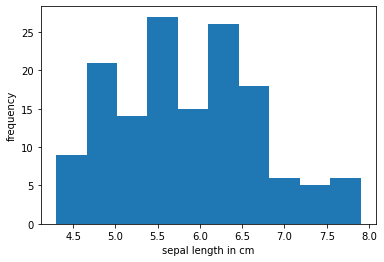

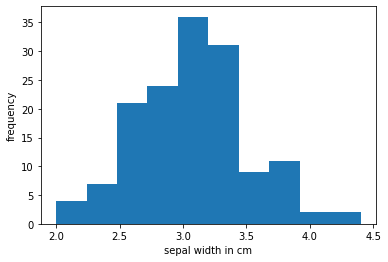

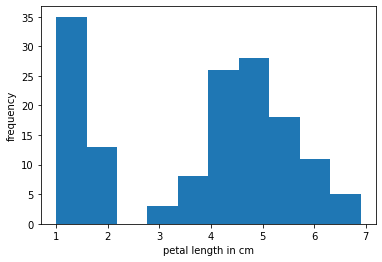

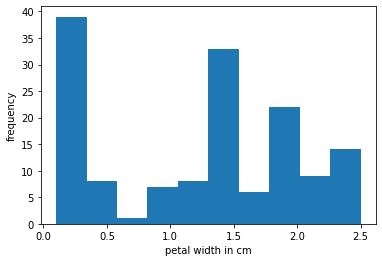

In [157]:
#visualizing each column using histograms
for i in range(4):
    plt.figure()
    plt.hist(df.iloc[:,i])
    plt.xlabel(df.columns[i])
    plt.ylabel("frequency")
    plt.show()

<AxesSubplot:xlabel='Class', ylabel='count'>

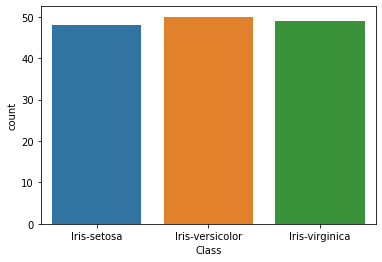

In [158]:
warnings.simplefilter("ignore")
df["Class"].value_counts()
sns.countplot(df['Class'])

# Preparing data for the machiene learning model 

<h3 style=\"font-size:5rem;color:black;\">Preparing the Features Variable<h3>

In [159]:
# X is the predector variable 
X = df.iloc[:,0:4]
X

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<h3 style=\"font-size:5rem;color:orange;\">Preparing the target variable<h3>

In [160]:
# y is the predected variable
y = df.iloc[:,4]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 147, dtype: object

# Splitting the data into training data and testing data using scikit-learn

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(" X_train shape : ", X_train.shape , "X_test shape : ", X_test.shape)
print(" y_train shape : ", y_train.shape , "y_test shape : ", y_test.shape)


 X_train shape :  (102, 4) X_test shape :  (45, 4)
 y_train shape :  (102,) y_test shape :  (45,)


# Fitting the model to the training data

In [162]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

# Evaluating the Models accuracy 

In [163]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(" accuracy score is : ", accuracy_score(y_test, y_pred)*100, "%")
conf = confusion_matrix(y_test, y_pred)
conf

 accuracy score is :  95.55555555555556 %


array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 13]], dtype=int64)